<a href="https://colab.research.google.com/github/BilalELOTMANI/Dog-Breed_Classification/blob/main/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Transfer Learning and TensorFlow 2.0 to Classify Different Dog Breeds

Have you ever been out and about, spotted a dog and wondered what breed it was? I have. And then someone says, "It's a English Terrier" and you think, how did they know that?

In this project, we will be using machine learning to help us identify different dog breeds. We will be using data from the Kaggle dog breed identification competition, which contains over 10,000 labeled images of 120 different dog breeds.

This type of problem is called multi-class image classification. It is multi-class because we are trying to classify multiple breeds of dogs, whereas if we were only trying to classify dogs versus cats, it would be called binary classification.

Multi-class image classification is an important field, as it is the same technology used by companies like Tesla in their self-driving cars or Airbnb in automatically adding information to their listings.

We will begin by preparing the data, which is the most crucial step in any deep learning problem, turning it into numbers.

We're going to go through the following TensorFlow/Deep Learning workflow:
1. Get data ready
2. Prepare the data 
3. Choose and fit/train a model (TensorFlow Hub, tf.keras.applications, TensorBoard, EarlyStopping).
4. Evaluating a model (making predictions, comparing them with the ground truth labels).
5. Improve the model through experimentation (start with 1000 images, make sure it works, increase the number of images).
6. Save, sharing and reloading your model.


To preprocess our data with TensorFlow 2.x, we will first turn it into Tensors (arrays of numbers which can be run on GPUs). This will allow us to use a pre-trained deep learning model from TensorFlow Hub to find patterns between our data. This process of using a pretrained model and adapting it to our own problem is called transfer learning. This strategy of using pre-existing models to speed up the process of training a machine learning algorithm is more efficient than training a model from scratch, as it saves time and resources.

## Getting our workspace ready

Before we get started, since we'll be using TensorFlow 2.x and TensorFlow Hub, lets's import them.


In [6]:
import tensorflow as tf
print("Tf  version: , tf.__version__")

Tf  version: , tf.__version__


In [ ]:
print("Tf  version: ", tf.__version__)

Tf  version:  2.9.2


Lets rerun some import statements. And check whether or not we're using a GPU.

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version: ", tf.__version__)
print("Hub version: ", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")


TF version:  2.9.2
Hub version:  0.12.0
GPU available (YESS!!!!)


You might be wondering what a GPU is or why we need one. The short story is, a GPU is a computer chip which is faster at doing numerical computing. And since machine learning is all about finding patterns in numbers, that's what we're after.

Running this for the first time in Colab will let us know there's no GPU available.

This is because by default Colab runs on a computer located on Google's servers which doesn't have a GPU attached to it.

But we can fix this going to runtime and then changing the runtime type:

1. Go to Runtime.
2. Click "Change runtime type".
3. Where it says "Hardware accelerator", choose "GPU" (don't worry about TPU for now but feel free to research them).
4. Click save.
5. The runtime will be restarted to activate the new hardware, so you'll have to rerun the above cells.
6. If the steps have worked you should see a print out saying "GPU available"

## Getting data ready

Since much of machine learning is getting your data ready to be used with a machine learning model, we'll take extra care getting it setup.

One method is to upload it to your Google Drive, mount your drive in this notebook and import the file

For this project, I've downloaded the data from Kaggle and uploaded it to my Google Drive as a .zip file under the folder "Data".

To access it, we'll have to unzip it.



## Accessing the data

Now the data files we're working with are available on our Google Drive, we can start to check it out.

Let's start with `labels.csv` which contains all of t
he image ID's and their assosciated dog breed (our data and labels).

In [2]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision Data/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


Looking at this, we can see there are 10222 different ID's (meaning 10222 different images) and 120 different breeds.

Let's figure out how many images there are of each breed.

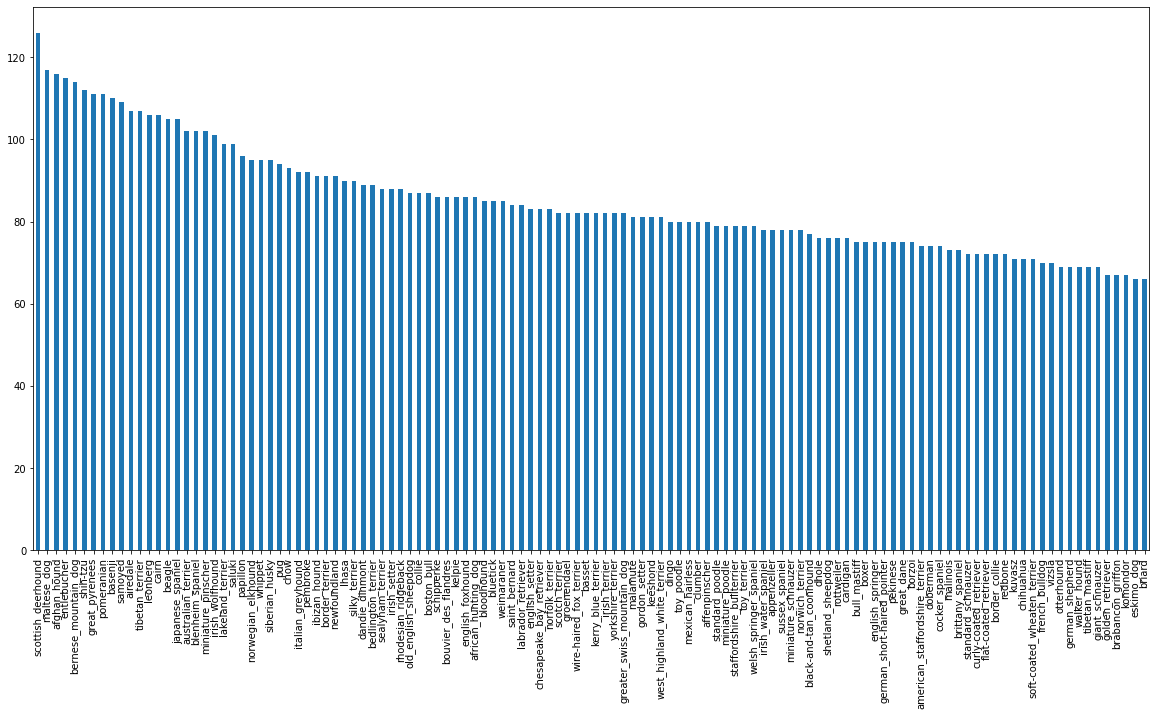

In [ ]:
# How many images are there of each bread?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

Okay sweet. If we were to roughly draw a line across the middle of the graph, we'd see there's about 60+ images for each dog breed.



This is a good amount as for some of their vision products Google recommends a minimum of 10 images per class to get started. And as you might imagine, the more images per class available, the more chance a model has to figure out patterns between them.



Let's check out one of the images.



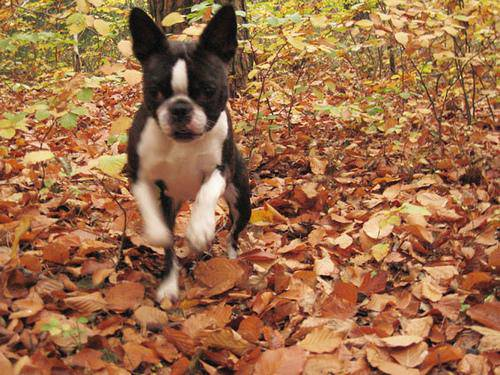

In [8]:
from IPython.display import display, Image
Image("drive/My Drive/Dog Vision Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

## Getting images and their labels

Since we've got the image ID's and their labels in a DataFrame (labels_csv), we'll use it to create:

* A list a filepaths to training images
* An array of all labels
* An array of all unique labels

We'll only create a list of filepaths to images rather than importing them all to begin with. This is because working with filepaths (strings) is much efficient than working with images.



In [3]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/Dog Vision Data/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10 filenames
filenames[:10]

['drive/MyDrive/Dog Vision Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision Data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision Data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision Data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision Data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision Data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision Data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision Data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision Data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision Data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

Now we've got a list of all the filenames from the ID column of `labels_csv`, we can compare it to the number of files in our training data directory to see if they line up.

If they do, great. If not, there may have been an issue when unzipping the data (what we did above), to fix this, you might have to unzip the data again. Be careful not to let your Colab notebook disconnect whilst unzipping.

In [4]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Vision Data/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


Let's do one more check. Visualizing directly from a filepath.



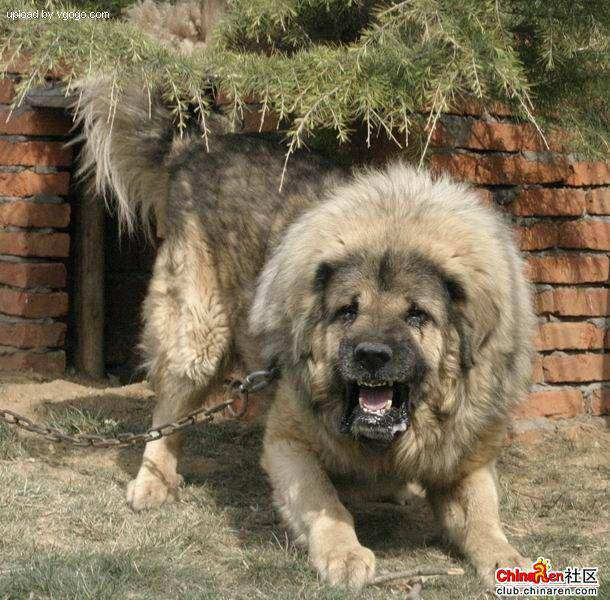

In [9]:
# Check an image directly from a filepath

Image(filenames[9000])

Now we've got our image filepaths together, let's get the labels.



We'll take them from `labels_csv` and turn them into a NumPy array.



In [10]:
import numpy as np
labels = labels_csv["breed"].to_numpy()  # convert labels column into numpy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [11]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


Finally, since a machine learning model can't take strings as input (what `labels` currently is), we'll have to convert our labels to numbers.



To begin with, we'll find all of the unique dog breed names.



Then we'll go through the list of `labels` and compare them to unique breeds and create a list of booleans indicating which one is the real label (`True`) and which ones aren't (`False`).



In [12]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

The length of  `unique_breeds` should be 120, meaning we're working with images of 120 different breeds of dogs.

Now use `unique_breeds` to help turn our `labels` array into an array of booleans.

In [13]:
# Example: Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_breeds # Use comparison operator to create boolean array

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

That's for one example, let's do the whole thing.



In [14]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

Why do we do this?

Remember, an important concept in machine learning is converting your data to numbers before passing it to a machine learning model.

In this case, we've transformed a single dog breed name such as `boston_bull` into a one-hot array.

Let's see an example.

In [15]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Wonderful! Now we've got our labels in a numeric format and our image filepaths easily accessible (they aren't numeric yet), let's split our data up.



## Creating our own validation set

Since the dataset from Kaggle doesn't come with a validation set (a split of the data we can test our model on before making final predicitons on the test set), let's make one.



We could use Scikit-Learn's train_test_split function or we could simply make manual splits of the data.



For accessibility later, let's save our filenames variable to `X` (data) and our labels to `y`.



In [16]:
# Setup X & y variables
x = filenames
y = boolean_labels

Since we're working with 10,000+ images, it's a good idea to work with a portion of them to make sure things are working before training on them all.



This is because computing with 10,000+ images could take a fairly long time. And our goal when working through machine learning projects is to reduce the time between experiments.



Let's start experimenting with 1000 and increase it as we need.



In [17]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

Now let's split our data into training and validation sets. We'll use and 80/20 split (80% training data, 20% validation data).



In [18]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state= 46)

len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [19]:
# Check out the training data (image file paths and labels)
x_train[:5], y_train[:2]

(['drive/MyDrive/Dog Vision Data/train/07b46335006fbbe0328aeb8213b874ce.jpg',
  'drive/MyDrive/Dog Vision Data/train/0ec8020bc2c4bc1646a81737be8580e0.jpg',
  'drive/MyDrive/Dog Vision Data/train/0486732311e9d60e8712f1dc33c4ebe0.jpg',
  'drive/MyDrive/Dog Vision Data/train/14597c96d5c222eebd742f4207296314.jpg',
  'drive/MyDrive/Dog Vision Data/train/024ecfa590271db8616bfaa59159d7b2.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False,  True, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, Fal

## Preprocessing images (turning images into Tensors)

Our labels are in numeric format but our images are still just file paths.



Since we're using TensorFlow, our data has to be in the form of Tensors.



A Tensor is a way to represent information in numbers. If you're familar with NumPy arrays (you should be), a Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.



Because of how TensorFlow stores information (in Tensors), it allows machine learning and deep learning models to be run on GPUs (generally faster at numerical computing).



To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filename as an input.
2. Uses TensorFlow to read the file and save it to a variable. `image`.
3. Turn our image (jpeg file) into tensors.
4. Resize the image to be of the shape (224,224).
5. Return the modified `image`.

You might be wondering why (224, 224), which is (heigh, width). It's because this is the size of input our model (we'll see this soon) takes, an image which is (224, 224, 3).



What? Where's the 3 from? We're getting ahead of ourselves but that's the number of colour channels per pixel, red, green and blue.



Let's make this a little more concrete.



In [20]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[70])  # read an image
image.shape

(375, 500, 3)

Notice the shape of `image`. It's (257, 350, 3). This is height, width, colour channel value.

And you can easily convert it to a Tensor using `tf.constant()`.



In [21]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[150, 171, 192],
        [152, 173, 194],
        [155, 176, 197],
        ...,
        [148, 167, 182],
        [148, 167, 182],
        [148, 167, 182]],

       [[150, 171, 192],
        [152, 173, 194],
        [154, 175, 196],
        ...,
        [148, 167, 182],
        [148, 167, 182],
        [148, 167, 182]]], dtype=uint8)>

Well now, lets build the function we are talking about.

In [22]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):

  """
  Takes an image file path and turns it into a tensor
  """

  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg file into numerical Tensor with color channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-225 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])

  return image

## Creating data batches

Wonderful. Now we've got a function to convert our images into Tensors, we'll now build one to turn our data into batches (more specifically, a TensorFlow `BatchDataset`).

What's a batch?

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.



Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.



TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of `process_image` function at the same time.



In [23]:
# Create a function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path and the associated label, processes the image and returns the tuple (image, label)
  """
  image = process_image(image_path)
  return image, label

Now we've got a simple function to turn our image file path names and their associated labels into tuples (we can turn these into Tensors next), we'll create a function to make data batches.



Because we'll be dealing with 3 different sets of data (training, validation and test), we'll make sure the function can accomodate for each set.



We'll set a default batch size of 32 because according to Yann Lecun (one of the OG's of deep learning), friends don't let friends train with batch sizes over 32.



In [24]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's the training data but doesn't shuffle it if it's the validation data.
  Also accepts the test data as input (no labels)
  """

  # if the data is a test dataset, we probably dont have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid datase, we dont need to shuffle it
  elif valid_data:
    print("Creating validation dataset batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),   # filepaths
                                               tf.constant(y)))  # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # If the data is a training dataset, we shuffle it
  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch



In [25]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data = True)

Creating training data batches...
Creating validation dataset batches...


In [26]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

Look at that! We've got our data in batches, more specifically, they're in Tensor pairs of (images, labels) ready for use on a GPU.



But having our data in batches can be a bit of a hard concept to understand. Let's build a function which helps us visualize what's going on under the hood.



## Visualizing data batches

In [27]:
import matplotlib.pyplot as plt

# Create a function for viewing images in data batches

def show_25_images(images, labels):
  """
  Displays 25 images from a data batche
  """

  # Setup the figure
  plt.figure(figsize = (10,10))
  # Loop through 25 (to diplay 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5,5,i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn grid lines off
    plt.axis("off")

To make computation efficient, a batch is a tighly wound collection of Tensors.



So to view data in a batch, we've got to unwind it.



We can do so by calling the `as_numpy_iterator()` method on a data batch.



This will turn our a data batch into something which can be iterated over.



Passing an iterable to `next()` will return the next item in the iterator.



In our case, next will return a batch of 32 images and label pairs.



*Note*: Running the cell below and loading images may take a little while.



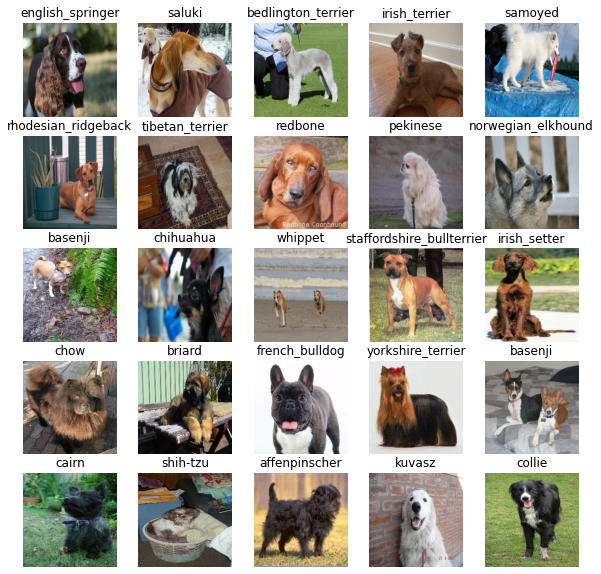

In [28]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

Question: Rerun the cell above, why do you think a different set of images is displayed each time you run it?



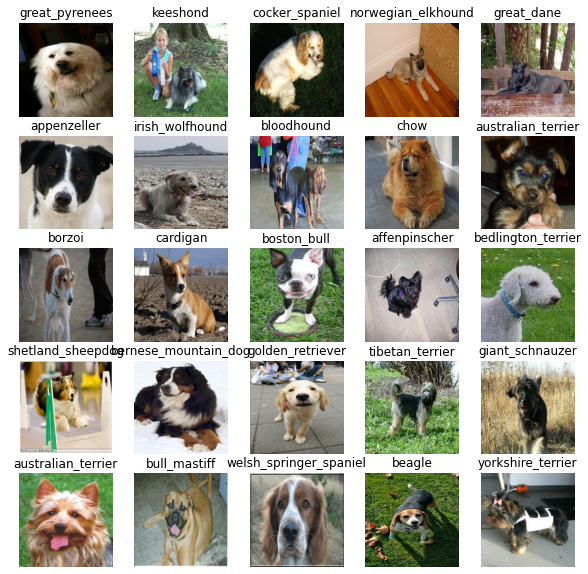

In [29]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Creating and training a model

Now our data is ready, let's prepare it for modelling. We'll use an existing model from [TensorFlow Hub](https://tfhub.dev/).

TensorFlow Hub is a resource where you can find pretrained machine learning models for the problem you're working on.

Using a pretrained machine learning model is often referred to as **transfer learning**.

### Why use a pretrained model?
Building a machine learning model and training it on lots from scratch can be expensive and time consuming.

Transfer learning helps eliviate some of these by taking what another model has learned and using that information with your own problem.

### How do we choose a model?
Since we know our problem is image classification (classifying different dog breeds), we can navigate [the TensorFlow Hub page by our problem domain (image)](https://tfhub.dev/s?module-type=image-augmentation,image-classification,image-feature-vector,image-generator,image-object-detection,image-others,image-style-transfer,image-rnn-agent).

We start by choosing the image problem domain, and then can filter it down by subdomains, in our case, [image classification](https://tfhub.dev/s?module-type=image-classification).

Doing this gives a list of different pretrained models we can apply to our task.

Clicking on one gives us information about the model as well as instructions for using it.

For example, clicking on the [mobilenet_v2_130_224 ](https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5)model, tells us this model takes an input of images in the shape 224, 224. It also says the model has been trained in the domain of image classification.

Let's try it out.

### Building a model

Before we build a model, there are a few things we need to define:



* The input shape (images, in the form of tensors) to our model
* The output shape (image labels, in the form of tensors) of our machine
* The URL of the model wa want to use

These things will be standard practice with whatever machine learning model you use. And because we're using TensorFlow, everything will be in the form of Tensors.



In [30]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]   # batch, height, width, color channels

# Setup shape of the model
OUTPUT_SHAPE = len(unique_breeds)    # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got the inputs, outputs and model we're using ready to go. We can start to put them together



There are many ways of building a model in TensorFlow but one of the best ways to get started is to use [the Keras API](https://www.tensorflow.org/guide/keras/sequential_model).

Defining a deep learning model in Keras can be as straightforward as saying, "here are the layers of the model, the input shape and the output shape, let's go!"



Knowing this, let's create a function which:



* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

We'll take a look at the code first, then dicuss each part.



In [31]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

What's happening here?

### Setting up the model layers

There are two ways to do this in Keras, the functional and sequential API. We've used the sequential.

Which one should you use?

The Keras documentation states the functional API is the way to go for defining complex models but the sequential API (a linear stack of layers) is perfectly fine for getting started, which is what we're doing.

The first layer we use is the model from TensorFlow Hub (`hub.KerasLayer(MODEL_URL))`. So our first layer is actually an entire model (many more layers). This input layer takes in our images and finds patterns in them based on the patterns `mobilenet_v2_130_224` has found.

The next layer (`tf.keras.layers.Dense())` is the output layer of our model. It brings all of the information discovered in the input layer together and outputs it in the shape we're after, 120 (the number of unique labels we have).

`The activation="softmax"` parameter tells the output layer, we'd like to assign a probability value to each of the 120 labels somewhere between 0 & 1. The higher the value, the more the model believes the input image should have that label. If we were working on a binary classification problem, we'd use `activation="sigmoid"`.

For more on which activation function to use, see the article Which [Loss and Activation Functions Should I Use?](https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8)

### Compiling the model
This one is best explained with a story.

Let's say you're at the international hill descending championships. Where your start standing on top of a hill and your goal is to get to the bottom of the hill. The catch is you're blindfolded.

Luckily, your friend Adam is standing at the bottom of the hill shouting instructions on how to get down.

At the bottom of the hill there's a judge evaluating how you're doing. They know where you need to end up so they compare how you're doing to where you're supposed to be. Their comparison is how you get scored.

Transferring this to `model.compile()` terminology:

* `loss` - The height of the hill is the loss function, the models goal is to minimize this, getting to 0 (the bottom of the hill) means the model is learning perfectly.
* `optimizer` - Your friend Adam is the optimizer, he's the one telling you how to navigate the hill (lower the loss function) based on what you've done so far. His name is Adam because the Adam optimizer is a great general which performs well on most models. Other optimizers include RMSprop and Stochastic Gradient Descent.
* `metrics` - This is the onlooker at the bottom of the hill rating how well your perfomance is. Or in our case, giving the accuracy of how well our model is predicting the correct image label.

### Building the model
We use `model.build()` whenever we're using a layer from TensorFlow Hub to tell our model what input shape it can expect.

In this case, the input shape is `[None, IMG_SIZE, IMG_SIZE, 3]` or `[None, 224, 224, 3]` or `[batch_size, img_height, img_width, color_channels]`.

Batch size is left as `None` as this is inferred from the data we pass the model. In our case, it'll be 32 since that's what we've set up our data batches as.

Now we've gone through each section of the function, let's use it to create a model.

We can call `summary()` on our model to get idea of what our model looks like.

In [32]:
# Create a model and check its details
model = create_model()
model.summary()  

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


The non-trainable parameters are the patterns learned by `mobilenet_v2_130_224` and the trainable parameters are the ones in the dense layer we added.



This means the main bulk of the information in our model has already been learned and we're going to take that and adapt it to our own problem.



### Creating callbacks

We've got a model ready to go but before we train it we'll make some callbacks.

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

The two callbacks we're going to add are a TensorBoard callback and an Early Stopping callback.

#### TensorBoard Callback

TensorBoard helps provide a visual way to monitor the progress of your model during and after training.



It can be used directly in a notebook to track the performance measures of a model such as loss and accuracy.

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:

1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize the our models training logs using the `%tensorboard` magic function (we'll do this later on).

In [33]:
# Load the TensorBoard notebook extention
%load_ext tensorboard

In [34]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Dog Vision Data/logs",
                        # Make so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  
  return tf.keras.callbacks.TensorBoard(logdir)


#### Early Stopping Callback

Early stopping helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).

It's basically like saying to our model, "keep finding patterns until the quality of those patterns starts to go down."

In [35]:
# Create early stopping (once our model stops improving, stop training)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience = 3)  # stops after 3 rounds of no improvements

#### Training a model (on a subset of data)

Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data.

We do this to make sure everything is working. And if it is, we can step it up later and train on the entire training dataset.

The final parameter we'll define before training is `NUM_EPOCHS` (also known as **number of epochs**).

`NUM_EPOCHS` defines how many passes of the data we'd like our model to do. A pass is equivalent to our model trying to find patterns in each dog image and see which patterns relate to each label.

If `NUM_EPOCHS=1`, the model will only look at the data once and will probably score badly because it hasn't a chance to correct itself. It would be like you competing in the international hill descent championships and your friend Adam only being able to give you 1 single instruction to get down the hill.

What's a good value for `NUM_EPOCHS`?

This one is hard to say. 10 could be a good start but so could 100. This is one of the reasons we created an early stopping callback. Having early stopping setup means if we set `NUM_EPOCHS` to 100 but our model stops improving after 22 epochs, it'll stop training.

Along with this, let's quickly check if we're still using a GPU.

In [36]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "available(YESSSS)"  if tf.config.list_physical_devices("GPU")  else "not available")

GPU available(YESSSS)


In [37]:
# How many rounds should we get the model to look through the data
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Boom! We've got a GPU running and `NUM_EPOCHS` setup. Let's create a simple function which trains a model. The function will:



* Create a model using `create_model()`.
* Setup a TensorBoard callback using `create_tensorboard_callback()` (we do * this here so it creates a log directory of the current date and time).
* Call the `fit()` function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
* Return the fitted model.


In [38]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version
  """

  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,   # Check validation metrics every epoch
            callbacks = [tensorboard, early_stopping]
            )
  
  return model



**Note** : When training a model for the first time, the first epoch will take a while to load compared to the rest. This is because the model is getting ready and the data is being initialised. Using more data will generally take longer, which is why we've started with ~1000 images. After the first epoch, subsequent epochs should take a few seconds.

In [41]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 163s 6s/step - loss: 4.5940 - accuracy: 0.0925 - val_loss: 3.3180 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 3s 123ms/step - loss: 1.6410 - accuracy: 0.6850 - val_loss: 2.0416 - val_accuracy: 0.5250
Epoch 3/100
25/25 [==============================] - 3s 121ms/step - loss: 0.5679 - accuracy: 0.9438 - val_loss: 1.5228 - val_accuracy: 0.6150
Epoch 4/100
25/25 [==============================] - 3s 118ms/step - loss: 0.2459 - accuracy: 0.9875 - val_loss: 1.3563 - val_accuracy: 0.6400
Epoch 5/100
25/25 [==============================] - 3s 121ms/step - loss: 0.1460 - accuracy: 0.9975 - val_loss: 1.2887 - val_accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 3s 123ms/step - loss: 0.0987 - accuracy: 1.0000 - val_loss: 1.2407 - val_accuracy: 0.6550
Epoch 7/100
25/25 [==============================]

**Question**: It looks like our model might be overfitting (getting far better results on the training set than the validation set), what are some ways to prevent model overfitting? Hint: this may involve searching something like "ways to prevent overfitting in a deep learning model?".



**Note**: Overfitting to begin with is a good thing. It means our model is learning something.



#### Checking the TensorBoard logs

Now our model has been trained, we can make its performance visual by checking the TensorBoard logs.



The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and viualize its contents.



In [42]:
%tensorboard --logdir drive/Mydrive/Dog Vision Data/logs

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [-

Thanks to our `early_stopping` callback, the model stopped training after 26 or so epochs (in my case, yours might be slightly different). This is because the validation accuracy failed to improve for 3 epochs.



But the good news is, we can definitely see our model is learning something. The validation accuracy got to 65% in only a few minutes.



This means, if we were to scale up the number of images, hopefully we'd see the accuracy increase.



### Making and evaluating predictions using a trained model

Before we scale up and train on more data, let's see some other ways we can evaluate our model. Because although accuracy is a pretty good indicator of how our model is doing, it would be even better if we could could see it in action.



Making predictions with a trained model is as calling `predict()` on it and passing it data in the same format the model was trained on.



In [43]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)  # verbose shows us how long there is to go
predictions

7/7 [==============================] - 4s 88ms/step


array([[3.7285430e-05, 1.1090684e-04, 3.2540649e-04, ..., 1.3401273e-04,
        4.2171348e-05, 9.4478579e-05],
       [4.7713766e-05, 1.6306604e-04, 5.3876001e-06, ..., 3.1514819e-06,
        2.8333601e-05, 2.4278273e-05],
       [6.6480003e-05, 6.1735958e-03, 1.4938171e-04, ..., 1.0386822e-05,
        8.2284743e-05, 6.3586179e-03],
       ...,
       [1.5104847e-02, 1.4402340e-02, 7.2753886e-05, ..., 3.2430969e-04,
        2.7911278e-04, 6.2841654e-04],
       [1.6910479e-04, 2.8075161e-04, 1.7542541e-05, ..., 1.6165541e-05,
        3.0099376e-04, 2.7566138e-04],
       [3.0761286e-05, 1.3075203e-05, 9.8496166e-06, ..., 9.6906624e-06,
        1.6857153e-04, 3.3416069e-05]], dtype=float32)

In [44]:
# Check the shape of the predictions
predictions.shape

(200, 120)

Making predictions with our model returns an array with a different value for each label.



In this case, making predictions on the validation data (200 images) returns an array (`predictions`) of arrays, each containing 120 different values (one for each unique dog breed).



These different values are the probabilities or the likelihood the model has predicted a certain image being a certain breed of dog. The higher the value, the more likely the model thinks a given image is a specific breed of dog.



Let's see how we'd convert an array of probabilities into an actual label.



In [45]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}")   # the max probabilty value predicted by the model
print(f"Sum: {np.sum(predictions[0])}")                # because we used softmax activation in our model, this will close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[3.72854302e-05 1.10906840e-04 3.25406494e-04 8.54836471e-05
 6.86068693e-03 1.44315930e-03 1.16094479e-05 1.33921450e-03
 1.75365261e-04 5.65126902e-06 3.24036919e-05 3.80613953e-02
 3.91609356e-05 1.31304172e-04 6.18083344e-04 1.90622959e-04
 1.99654140e-02 1.56027696e-03 5.82046196e-05 1.28437940e-03
 1.90173727e-04 1.67132777e-04 2.51624115e-05 3.07969691e-04
 5.05789928e-03 1.11511254e-04 2.24155534e-04 2.61830282e-03
 2.87849107e-03 1.86435500e-04 3.35661555e-03 4.30394383e-03
 9.43047489e-05 3.87984933e-03 1.42048841e-04 6.28501736e-03
 1.17361415e-05 6.80627054e-05 1.06566609e-03 3.03302950e-04
 7.47975719e-04 2.28303707e-05 5.02847397e-05 1.60455126e-02
 3.37486010e-04 3.03378874e-05 4.54358436e-04 7.79292255e-04
 1.06816246e-04 4.05043643e-03 3.23737295e-05 3.25511699e-03
 6.87368691e-01 3.53840209e-04 4.74749104e-04 3.20121617e-04
 8.28917618e-05 2.09432241e-04 6.44579195e-05 2.15823855e-03
 1.48481660e-04 6.62841310e-04 2.11428836e-04 1.43189289e-04
 1.31847582e-05 7.867653

Having this information is great but it would be even better if we could compare a prediction to its true label and original image.



To help us, let's first build a little function to convert prediction probabilities into predicted labels.



**Note**: Prediction probabilities are also known as confidence levels.



In [46]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'great_pyrenees'

Wonderful! Now we've got a list of all different predictions our model has made, we'll do the same for the validation images and validation labels.



Remember, the model hasn't trained on the validation data, during the `fit()` function, it only used the validation data to evaluate itself. So we can use the validation images to visually compare our models predictions with the validation labels.

Since our validation data (`val_data`) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (using `unbatch()`) and then turn it into an iterator using `as_numpy_iterator()`.

Let's make a small function to do so.

In [47]:
# Create a function to unbatch a batched dataset
def unbatch(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels 
  """ 

  images = []
  labels = []

  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels


# Unbatch the validation data
val_images, val_labels = unbatch(val_data)
val_images[0], val_labels[0]     

(array([[[0.01820525, 0.02604839, 0.        ],
         [0.03461134, 0.04245448, 0.00177962],
         [0.08103258, 0.08887572, 0.03700247],
         ...,
         [0.10435918, 0.1354166 , 0.08534657],
         [0.09851189, 0.12917274, 0.08156515],
         [0.09266449, 0.12221631, 0.08149502]],
 
        [[0.01443187, 0.01849959, 0.        ],
         [0.02946429, 0.03643129, 0.00043846],
         [0.0649685 , 0.07281164, 0.02683371],
         ...,
         [0.09606541, 0.05858284, 0.03058935],
         [0.09367996, 0.05530461, 0.02998948],
         [0.09034222, 0.05196687, 0.02665174]],
 
        [[0.01071429, 0.01463586, 0.        ],
         [0.01905606, 0.02297763, 0.        ],
         [0.03238624, 0.04022938, 0.00617826],
         ...,
         [0.10196079, 0.02050063, 0.        ],
         [0.09835435, 0.0160014 , 0.        ],
         [0.09835435, 0.0160014 , 0.        ]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

Now we've got ways to get:



* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some functions to make these all a bit more visualize.



More specifically, we want to be able to view an image, its predicted label and its actual label (true label).



The first function we'll create will:



* Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [48]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # get the pred label
  pred_label = get_pred_label(pred_prob)

  # plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.title("{}{:2.0f}% ({})".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)    




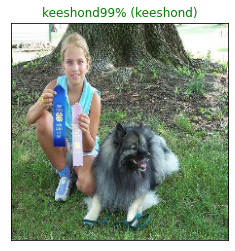

In [49]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities = predictions,
         labels = val_labels,
         images = val_images)

Nice! 
Making functions to help visual your models results are really helpful in understanding how your model is doing.

Since we're working with a multi-class problem (120 different dog breeds), it would also be good to see what other guesses our model is making. More specifically, if our model predicts a certain label with 24% probability, what else did it predict?

Let's build a function to demonstrate. The function will:

* Take an input of a prediction probabilities array, a ground truth labels array and an integer.
* Find the predicted label using get_pred_label().
* Find the top 10:
1.  Prediction probabilities indexes
2.  Prediction probabilities values
3.  Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green.

In [50]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

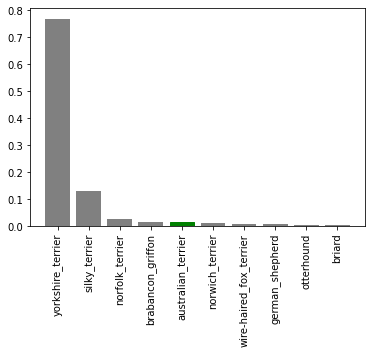

In [51]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Wonderful! Now we've got some functions to help us visualize our predictions and evaluate our model, let's check out a few.



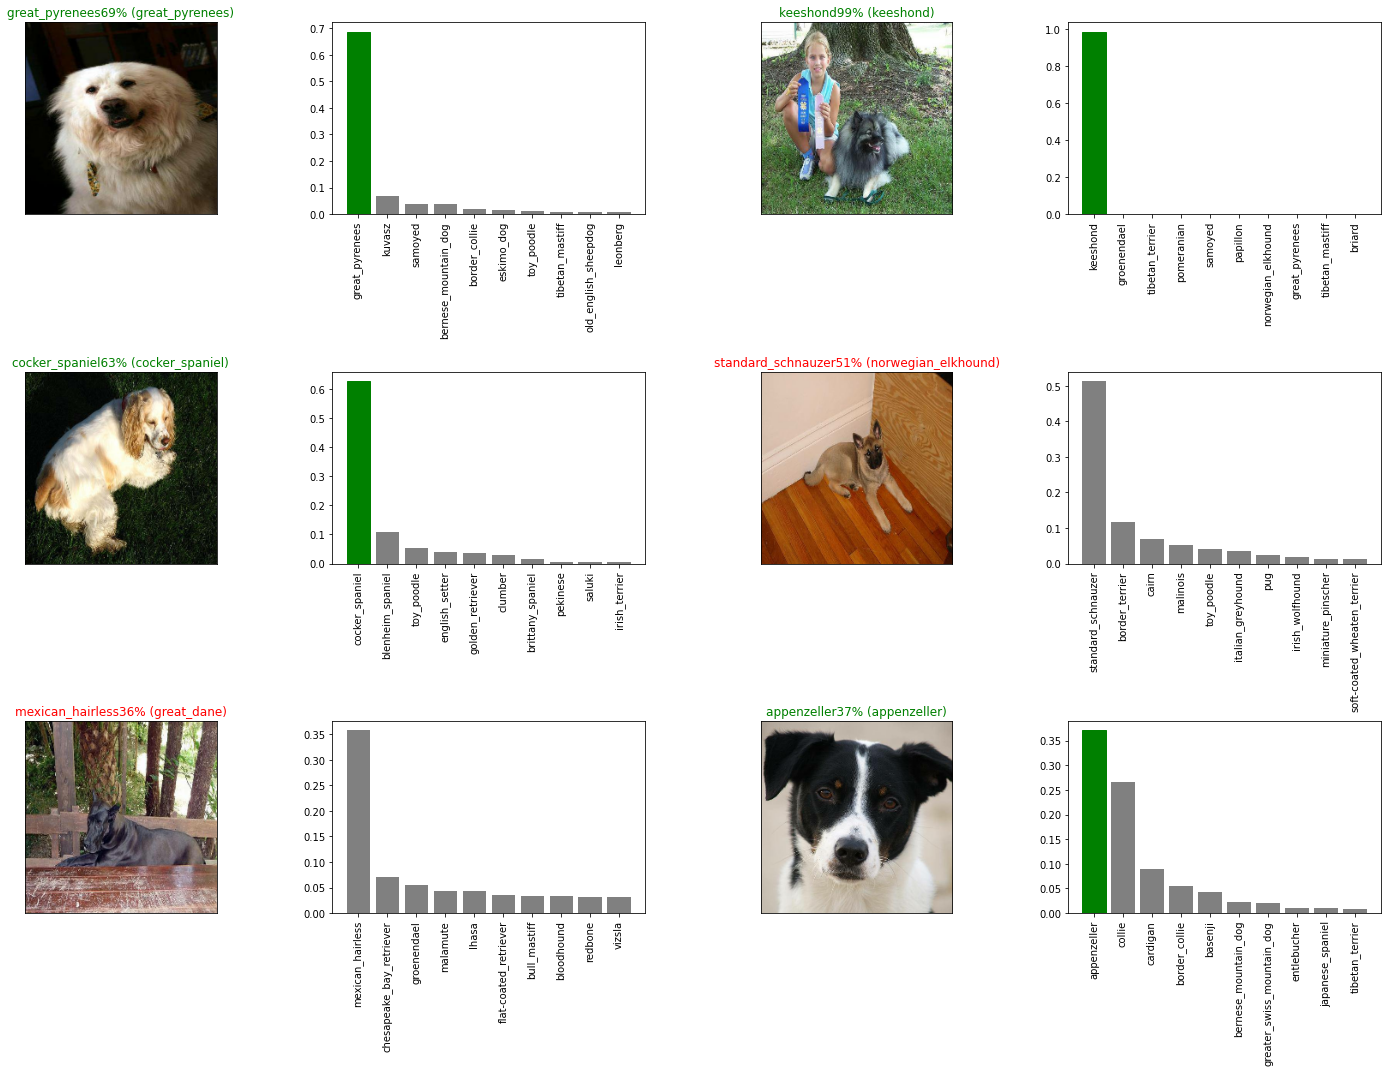

In [52]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a model

After training a model, it's a good idea to save it. Saving it means you can share it with colleagues, put it in an application and more importantly, won't have to go through the potentially expensive step of retraining it.



The format of an entire saved Keras model is h5. So we'll make a function which can take a model as input and utilise the `save()` method to save it as a h5 file to a specified directory.



In [53]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/MyDrive/Dog Vision Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

If we've got a saved model, we'd like to load it, let's create a function which can take a model path and use the `tf.keras.models.load_model()` function to load it into the notebook.



Because we're using a component from TensorFlow Hub (`hub.KerasLayer`) we'll have to pass this as a parameter to the `custom_objects` parameter.



In [54]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [55]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: drive/MyDrive/Dog Vision Data/models/20230128-13381674913115-1000-images-Adam.h5...


'drive/MyDrive/Dog Vision Data/models/20230128-13381674913115-1000-images-Adam.h5'

In [56]:
# Load our model trained on 1000 images
model_1000_images = load_model('drive/MyDrive/Dog Vision Data/models/20230125-23341674689672-1000-images-Adam.h5')

Loading saved model from: drive/MyDrive/Dog Vision Data/models/20230125-23341674689672-1000-images-Adam.h5


Compare the two models (the original one and loaded one). We can do so easily using the `evaluate()` method.



In [57]:
 # Evaluate the pre-saved model
 model.evaluate(val_data)

7/7 [==============================] - 1s 82ms/step - loss: 1.1135 - accuracy: 0.6900


[1.1135207414627075, 0.6899999976158142]

In [58]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 1s 92ms/step - loss: 1.1307 - accuracy: 0.6750


[1.130662441253662, 0.675000011920929]

## Training a model (on the full data)

Now we know our model works on a subset of the data, we can start to move forward with training one on the full data.



Above, we saved all of the training filepaths to `X` and all of the training labels to `y`. Let's check them out.



In [60]:
# Remind ourselves of the size of full data
len(x), len(y)

(10222, 10222)

  Above, we saved all of the training filepaths to X and all of the training labels to y. Let's check them out.



Before we can train a model on these, we'll have to turn them into a data batch.



The beautiful thing is, we can use our `create_data_batches()` function from above which also preprocesses our images for us (thank you past us for writing a helpful function).



In [63]:
# Turn full training data into a data batch
full_data = create_data_batches(x,y)

Creating training data batches...


Our data is in a data batch, all we need now is a model.



And surprise, we've got a function for that too! Let's use `create_model()` to instantiate another model.



In [64]:
# Instantiate a new model to train on the full data
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


Since we've made a new model instance, `full_model`, we'll need some callbacks too.



In [65]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note : No validation set when training on all data, therefore can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience = 3)

To monitor the model whilst it trains, we'll load TensorBoard (it should update every 30-seconds or so whilst the model trains).



In [66]:
%tensorboard --logdir drive/MyDrive/Dog Vision Data/logs

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [-

**Note**: Since running the cell below will cause the model to train on all of the data (10,000+) images, it may take a fairly long time to get started and finish. However, thanks to our `full_model_early_stopping` callback, it'll stop before it starts going too long.



Remember, the first epoch is always the longest as data gets loaded into memory. After it's there, it'll speed up.



In [67]:
# Fit the model to the full data
full_model.fit(x = full_data,
               epochs = NUM_EPOCHS,
               callbacks = [full_model_tensorboard,
                            full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 6612s 21s/step - loss: 1.3577 - accuracy: 0.6671
Epoch 2/100
320/320 [==============================] - 32s 101ms/step - loss: 0.4021 - accuracy: 0.8828
Epoch 3/100
320/320 [==============================] - 31s 96ms/step - loss: 0.2425 - accuracy: 0.9308
Epoch 4/100
320/320 [==============================] - 31s 97ms/step - loss: 0.1539 - accuracy: 0.9626
Epoch 5/100
320/320 [==============================] - 31s 96ms/step - loss: 0.1079 - accuracy: 0.9793
Epoch 6/100
320/320 [==============================] - 31s 96ms/step - loss: 0.0782 - accuracy: 0.9863
Epoch 7/100
320/320 [==============================] - 31s 97ms/step - loss: 0.0591 - accuracy: 0.9918
Epoch 8/100
320/320 [==============================] - 32s 100ms/step - loss: 0.0458 - accuracy: 0.9944
Epoch 9/100
320/320 [==============================] - 31s 96ms/step - loss: 0.0393 - accuracy: 0.9955
Epoch 10/100
320/320 [==============================] - 31s 96ms/step 

## Saving and reloading the full model

Even on a GPU, our full model took a while to train. So it's a good idea to save it.



We can do so using our `save_model()` function.



In [68]:
# Save model to file 
save_model(full_model, suffix="all-images-Adam")

Saving model to: drive/MyDrive/Dog Vision Data/models/20230128-16041674921890-all-images-Adam.h5...


'drive/MyDrive/Dog Vision Data/models/20230128-16041674921890-all-images-Adam.h5'

In [69]:
# Load in the full model
loaded_full_model = load_model('drive/MyDrive/Dog Vision Data/models/20230128-16041674921890-all-images-Adam.h5')

Loading saved model from: drive/MyDrive/Dog Vision Data/models/20230128-16041674921890-all-images-Adam.h5


### Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.



Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.



To make predictions on the test data, we'll:



* Get the test image filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the test_data parameter to True (since there are no labels with the test images).
* Make a predictions array by passing the test data batches to the `predict()` function.

In [70]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "drive/MyDrive/Dog Vision Data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]


['drive/MyDrive/Dog Vision Data/test/e14cc46044a0fb31554250b07c93bd48.jpg',
 'drive/MyDrive/Dog Vision Data/test/e2b4d6b6590fa2941e74238248093eb3.jpg',
 'drive/MyDrive/Dog Vision Data/test/e22127411f6347464f3e91a775bd0245.jpg',
 'drive/MyDrive/Dog Vision Data/test/e6926a5046cd957245918c33985bcd62.jpg',
 'drive/MyDrive/Dog Vision Data/test/dcfd3463e1d23d51b309b0385292870b.jpg',
 'drive/MyDrive/Dog Vision Data/test/de327414ced20d4e6f786a68bff82e10.jpg',
 'drive/MyDrive/Dog Vision Data/test/df0196ea5d16d1570c1f2b567b975b90.jpg',
 'drive/MyDrive/Dog Vision Data/test/e78b4a09e5f86c330e24c6aaed63f0be.jpg',
 'drive/MyDrive/Dog Vision Data/test/e2e9e37fa587ad87761da12e105c2b6b.jpg',
 'drive/MyDrive/Dog Vision Data/test/e5f207e00213cc76be3ae9219a2e49cb.jpg']

In [71]:
# How many test images are there
len(test_filenames)

10357

In [72]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data = True)

Creating test data batches...


**Note**: Since there are 10,000+ test images, making predictions could take a while, even on a GPU. So beware running the cell below may take up to an hour.

